In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf

Data Pipeline

In [2]:
from pathlib import Path
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True ,exist_ok=True)
        url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing.csv"))  

In [3]:
housing = load_housing_data()

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


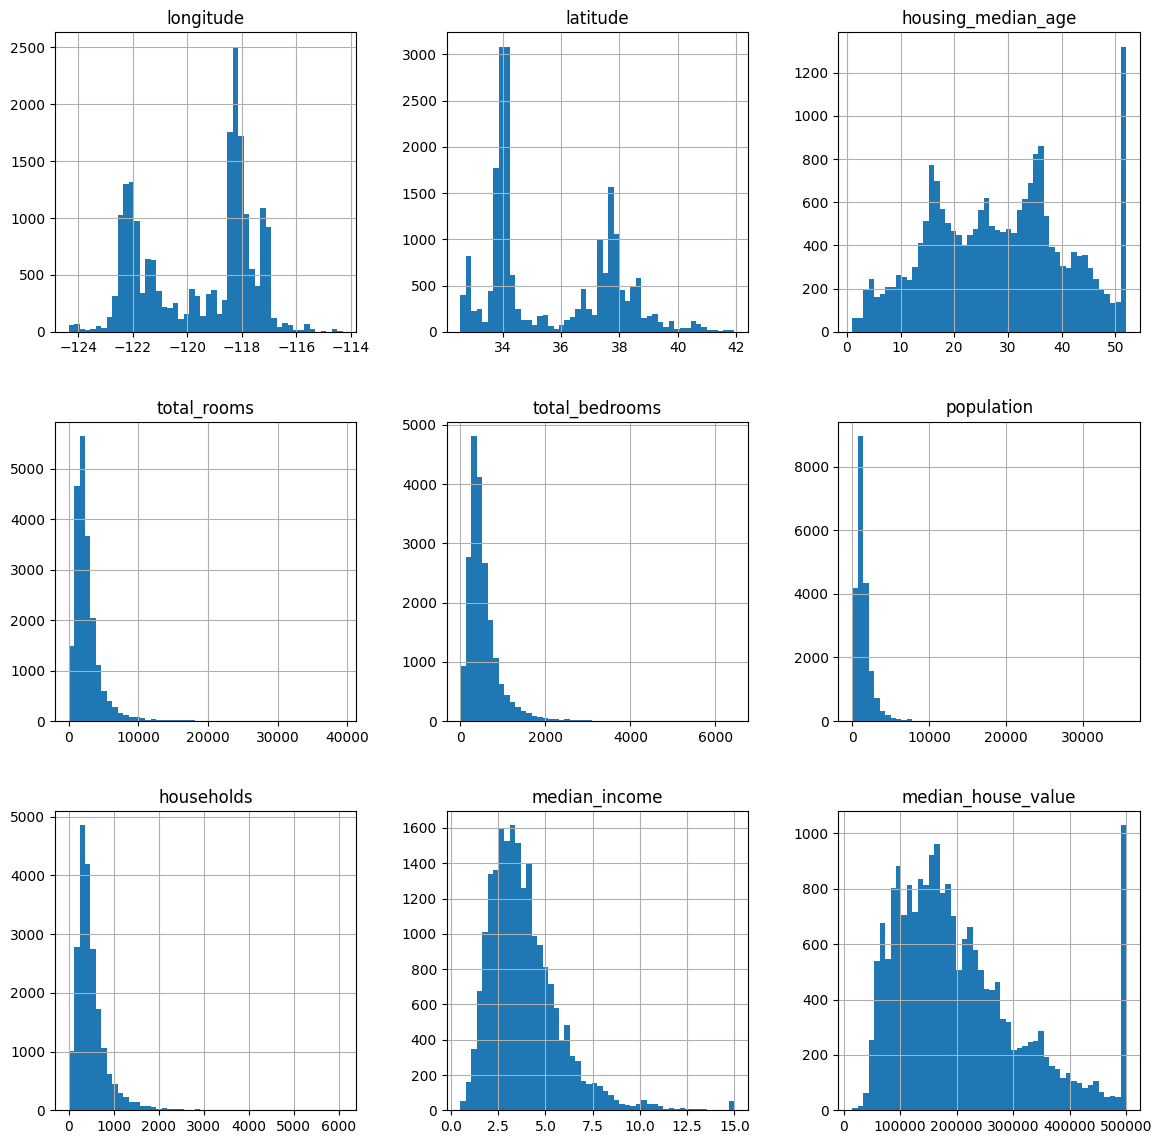

In [7]:
housing.hist(bins = 50 , figsize = (14,14))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

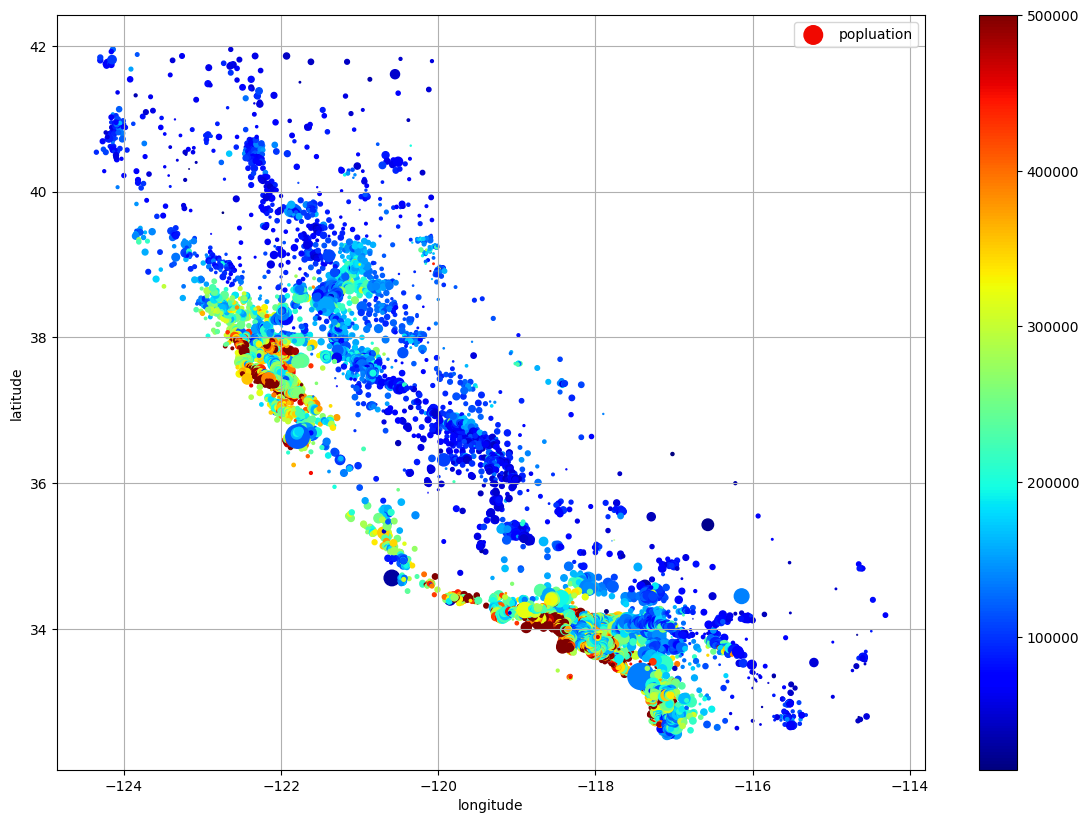

In [8]:
housing.plot(kind = 'scatter' , x = 'longitude' , y = 'latitude' , grid = True , s =housing['population']/100 , label = 'popluation' , c= housing['median_house_value'] , cmap = 'jet',
             colorbar= True, legend = True , sharex = False , figsize = (14,9.8) )

In [9]:
dataset_path = Path("datasets/housing.csv")
dataset_line = tf.data.TextLineDataset(str(dataset_path))
record_defaults = [tf.constant([0.], dtype=tf.float32)] * 7 + [tf.constant([0.], dtype=tf.float32)] * 2 + [tf.constant([], dtype=tf.string)] 

In [10]:
def parserx(line):
    x = tf.io.decode_csv(line, record_defaults=record_defaults)
    features1 = tf.stack(x[:8])
    features2 = tf.stack(x[9])
    return features1 , features2
def parsery(line):
    x = tf.io.decode_csv(line, record_defaults=record_defaults)
    return tf.stack(x[8])

In [11]:
data_x = dataset_line.skip(1).map(parserx)
data_y = dataset_line.skip(1).map(parsery)

In [12]:
data_x_wide_array = tf.TensorArray(tf.string, size = 0 , dynamic_size=True)
data_x_deep_array = tf.TensorArray(tf.float32, size = 0 , dynamic_size=True)
data_y_array = tf.TensorArray(tf.float32, size = 0, dynamic_size = True)

In [13]:
for x, y in data_x:
    data_x_deep_array = data_x_deep_array.write(data_x_deep_array.size(), x)
    data_x_wide_array = data_x_wide_array.write(data_x_wide_array.size(), y)

In [14]:
train_x_deep = data_x_deep_array.stack()
train_x_wide = data_x_wide_array.stack()

In [15]:
for f in data_y:
    data_y_array = data_y_array.write(data_y_array.size(), f)

In [16]:
train_y = data_y_array.stack()

In [17]:
tf.reshape(train_y , (train_y.shape[0], 1))

<tf.Tensor: shape=(20640, 1), dtype=float32, numpy=
array([[452600.],
       [358500.],
       [352100.],
       ...,
       [ 92300.],
       [ 84700.],
       [ 89400.]], dtype=float32)>

In [18]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir='V3CalHousingLogs'):
  return Path(root_logdir)/strftime('rin_%Y_%m_%d_%H_%M_%S')

run_logdir = get_run_logdir()

Utility Functions

## Model

Model Architecture

In [19]:
class PreprocessingLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    def call(self, inputs):
        X = inputs
        Encoder = tf.keras.layers.StringLookup()
        Encoder = Encoder.adapt(inputs)
        X = Encoder(inputs)
        return X

In [20]:
class CalRegModel(tf.keras.Model):
    def __init__(self, ConcatBool ,**kwargs):
        super().__init__(**kwargs)
        self.Preprocesswide = PreprocessingLayer()
        self.Norm_ = tf.keras.layers.Normalization()
        self.DenseNet = tf.keras.Sequential([
            tf.keras.layers.Dense(128, activation = tf.keras.activations.relu,
                                  kernel_initializer = tf.keras.initializers.glorot_normal()) ,
            tf.keras.layers.Dense(256, activation = tf.keras.activations.relu,
                                  kernel_initialzer = tf.keras.initializers.glorot_normal(),
                                  kernel_regularizer =  tf.keras.regularizers.l2(0.1)),
            tf.keras.layers.Dense(256, activation = tf.keras.activations.relu,
                                  kernel_initializer = tf.keras.initializers.he_normal()),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(128, activation = tf.keras.activations.relu,
                                  kernel_initialzer = tf.keras.initializers.he_normal()),
            tf.keras.layers.Dropout(rate = 0.2),
            tf.keras.layers.Dense(64 , activation = tf.keras.activations.relu,
                                  kernel_initailzer = tf.keras.initializers.he_normal()),
            tf.keras.layers.Dropout(rate = 0.2),
            tf.keras.layers.Dense(64, activation = tf.keras.activations.relu,
                                  kernel_initializer = tf.keras.initializers.he_normal()),
            tf.keras.layers.Dense(128 , activation = tf.keras.activations.relu,
                                  kernel_initialzers = tf.keras.initializers.he_normal()),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(64, activation = tf.keras.activations.relu,
                                  kernel_initializer = tf.keras.initializers.he_normal()),
            tf.keras.layers.Dense(1 , activation = 'linear')
        ])
        

In [21]:
c = np.random.randint(1 , 10 , (6,4))
p = np.random.randint(1 , 10 , (8,4))

In [22]:
c.shape

(6, 4)

In [23]:
np.expand_dims(c[:,0], 1), np.expand_dims(p[:,0], 0)

(array([[4],
        [8],
        [5],
        [3],
        [5],
        [6]]),
 array([[8, 6, 7, 6, 1, 6, 9, 3]]))

In [24]:
np.maximum(np.expand_dims(c[:,0], 1),np.expand_dims(p[:,0], 0))

array([[8, 6, 7, 6, 4, 6, 9, 4],
       [8, 8, 8, 8, 8, 8, 9, 8],
       [8, 6, 7, 6, 5, 6, 9, 5],
       [8, 6, 7, 6, 3, 6, 9, 3],
       [8, 6, 7, 6, 5, 6, 9, 5],
       [8, 6, 7, 6, 6, 6, 9, 6]])